### Download the dataset

In [33]:
import zipfile
import pandas as pd
import random

In [2]:
# Download zip file of pizza_steak images
# !wget 'https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip' 
import urllib.request
url = 'https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip'
filename = 'pizza_steak.zip'
urllib.request.urlretrieve(url, filename)

('pizza_steak.zip', <http.client.HTTPMessage at 0x16d6a123850>)

#### Unzip the downloaded filze

In [3]:
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [4]:
import os

In [5]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

In [6]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
list(class_names)

['pizza', 'steak']

#### Function to display a random image from the dataset folder

In [7]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


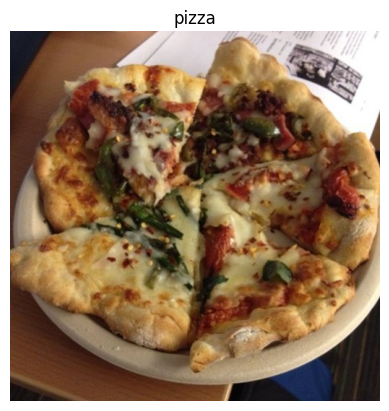

In [8]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [9]:
img.shape

(512, 512, 3)

#### Data preprocessing
- scaling to [0,1]
- loading into batches
- reducing image size to (224,224)

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


#### First model

In [66]:
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

In [67]:
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [58]:
model_1.fit(train_data, epochs=5,
            steps_per_epoch=len(train_data),
           validation_data=valid_data,
           validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 6s 125ms/step - loss: 0.5942 - accuracy: 0.6620 - val_loss: 0.4118 - val_accuracy: 0.8320
Epoch 2/5
47/47 [==============================] - 6s 128ms/step - loss: 0.4491 - accuracy: 0.7967 - val_loss: 0.3758 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 6s 125ms/step - loss: 0.4269 - accuracy: 0.8207 - val_loss: 0.3410 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 6s 120ms/step - loss: 0.3442 - accuracy: 0.8460 - val_loss: 0.3035 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 6s 120ms/step - loss: 0.2793 - accuracy: 0.8947 - val_loss: 0.2894 - val_accuracy: 0.8780


More food data (10 classes)
https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

#### Try a non-convolutional model

In [18]:
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_2.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy',]
)

In [19]:
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data)
                       )

Epoch 1/5
47/47 [==============================] - 6s 113ms/step - loss: 5.5482 - accuracy: 0.6280 - val_loss: 0.9160 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 5s 112ms/step - loss: 0.7005 - accuracy: 0.7287 - val_loss: 1.3570 - val_accuracy: 0.5640
Epoch 3/5
47/47 [==============================] - 5s 111ms/step - loss: 0.9881 - accuracy: 0.6733 - val_loss: 0.6658 - val_accuracy: 0.7220
Epoch 4/5
47/47 [==============================] - 5s 110ms/step - loss: 0.5858 - accuracy: 0.7687 - val_loss: 0.5662 - val_accuracy: 0.7420
Epoch 5/5
47/47 [==============================] - 5s 113ms/step - loss: 0.5048 - accuracy: 0.7847 - val_loss: 0.4493 - val_accuracy: 0.7920


#### Function to get train and valid learning plots from model history

In [53]:
def get_history_plots(history):
    history_df = pd.DataFrame(history.history)
    plt.figure(figsize=(10,7))
    history_df.loc[:, ['loss', 'accuracy']].plot()
    plt.figure(figsize=(10,7))
    history_df.loc[:, ['val_loss', 'val_accuracy']].plot()

<Figure size 1000x700 with 0 Axes>

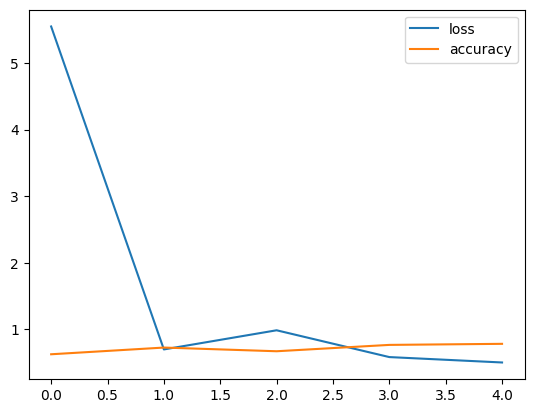

<Figure size 1000x700 with 0 Axes>

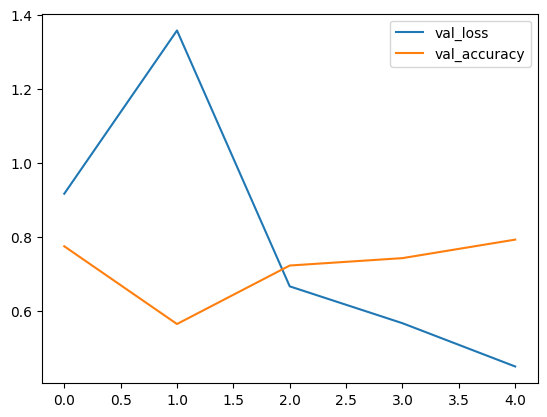

In [56]:
get_history_plots(history_2)

In [32]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_12 (Dense)            (None, 100)               15052900  
                                                                 
 dense_13 (Dense)            (None, 100)               10100     
                                                                 
 dense_14 (Dense)            (None, 10)                1010      
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 15064021 (57.46 MB)
Trainable params: 15064021 (57.46 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
def display_even_folder_images(folder_path, labels, num_images = 4):
    """
    folder_path -  eg. './pizza_steak/train/'
    labels  - eg. ['pizza', 'steak']
    num_images - even number of images to display
    """
    size = num_images//2
    labels = labels * size
    plt.figure(figsize=(12,12))
    random_labels = random.sample(labels, k=num_images)
    for label_i, label in enumerate(random_labels):
        label_images = os.listdir(folder_path + '/' + label)
        image = random.sample(label_images, 1)[0]
        plt.subplot(size,size,label_i+1)
        img = mpimg.imread(folder_path + '/' + label + '/' + image)
        plt.imshow(img)
        plt.title(label)
        plt.axis("off");

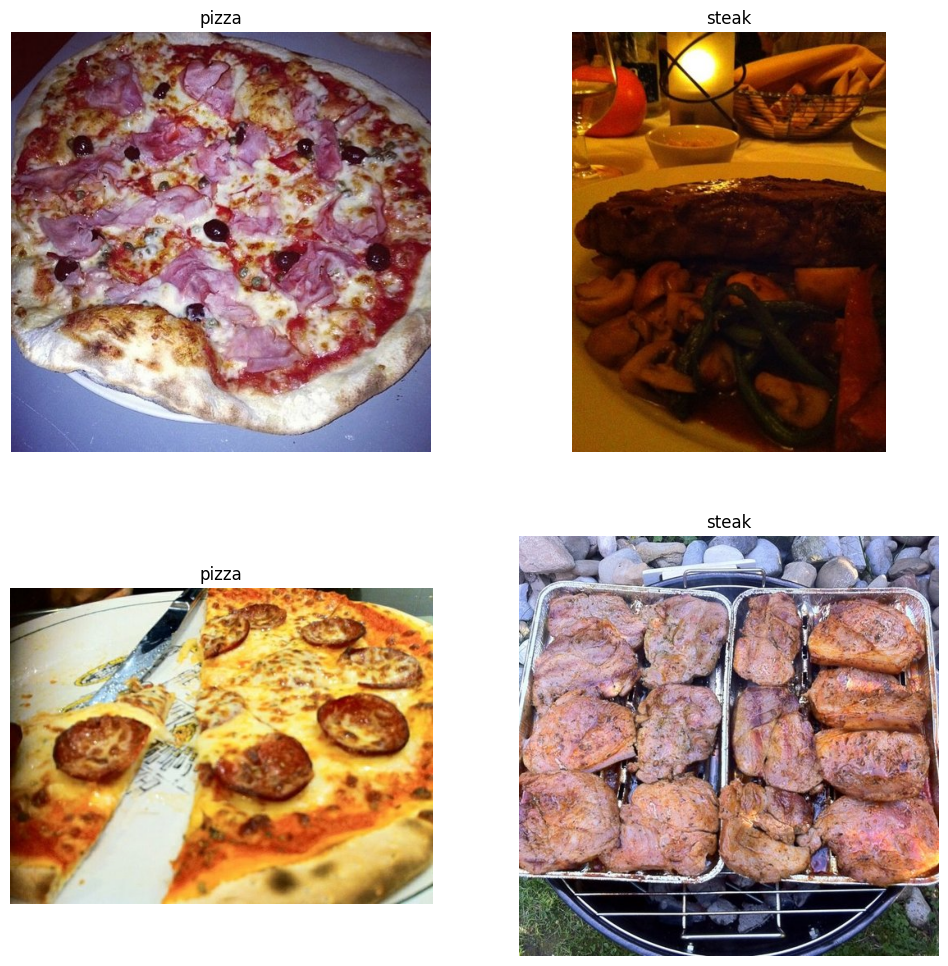

In [52]:
display_even_folder_images('./pizza_steak/train', ['pizza', 'steak'])

#### Function for trying out model and data (from data generators) combinations

In [62]:
def test_model_data_combination(model, train_data, valid_data, epochs=10, verbose=0):
    model_history = model.fit(
        train_data,
        epochs=epochs,
        steps_per_epoch=len(train_data),
        validation_data = valid_data,
        validation_steps = len(valid_data),
        verbose = verbose
    )
    evaluation = model.evaluate(valid_data)
    print('Eval: ', evaluation)
    get_history_plots(model_history)

16/16 [==============================] - 1s 54ms/step - loss: 0.5669 - accuracy: 0.7940
Eval:  [0.5669070482254028, 0.7940000295639038]


<Figure size 1000x700 with 0 Axes>

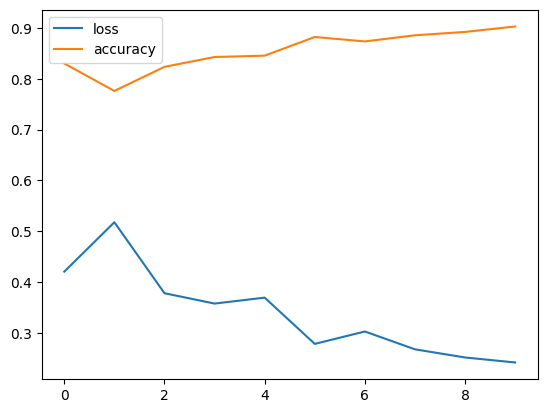

<Figure size 1000x700 with 0 Axes>

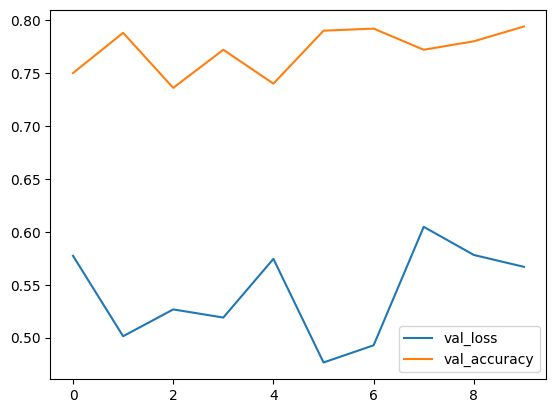

In [59]:
test_model_data_combination(model_2, train_data, valid_data, 10)

#### Try augmenting the data

In [73]:
train_datagen_aug = ImageDataGenerator(rescale=1./255,
                                       rotation_range = 20,
                                       vertical_flip=True,
                                       horizontal_flip=True,
                                       zoom_range = 0.2,
                                       brightness_range = (0, 1),
                                      )
valid_datagen_aug = ImageDataGenerator(rescale=1./255,
                                       rotation_range = 20,
                                       vertical_flip=True,
                                       horizontal_flip=True,
                                       zoom_range = 0.2,
                                       brightness_range = (0, 1),
                                      )

In [74]:
train_data_aug = train_datagen_aug.flow_from_directory(train_dir,
                                                       batch_size=32,
                                                       target_size=(224,224),
                                                       class_mode="binary",
                                                       shuffle=True)
valid_data_aug = valid_datagen_aug.flow_from_directory(test_dir,
                                                       batch_size=32,
                                                       target_size=(224,224),
                                                       class_mode="binary")

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Epoch 1/5
47/47 [==============================] - 13s 278ms/step - loss: 0.4567 - accuracy: 0.7927 - val_loss: 0.4050 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 13s 273ms/step - loss: 0.4830 - accuracy: 0.7660 - val_loss: 0.2943 - val_accuracy: 0.8640
Epoch 3/5
47/47 [==============================] - 13s 273ms/step - loss: 0.4224 - accuracy: 0.8060 - val_loss: 0.5038 - val_accuracy: 0.8180
Epoch 4/5
47/47 [==============================] - 13s 273ms/step - loss: 0.4019 - accuracy: 0.8240 - val_loss: 0.3586 - val_accuracy: 0.8620
Epoch 5/5
16/16 [==============================] - 1s 59ms/step - loss: 0.3094 - accuracy: 0.8620
Eval:  [0.30940261483192444, 0.8619999885559082]


<Figure size 1000x700 with 0 Axes>

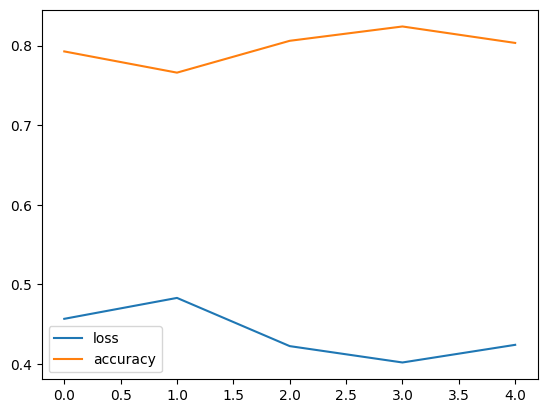

<Figure size 1000x700 with 0 Axes>

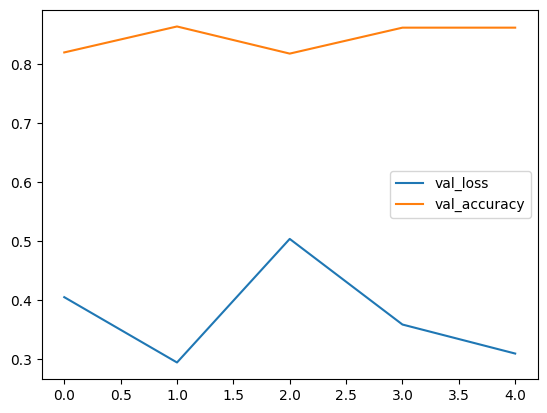

In [75]:
test_model_data_combination(model_1, train_data_aug, valid_data, epochs=5, verbose=1)

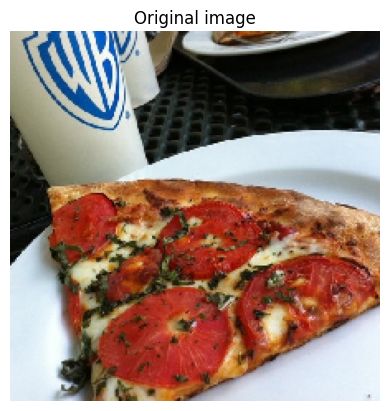

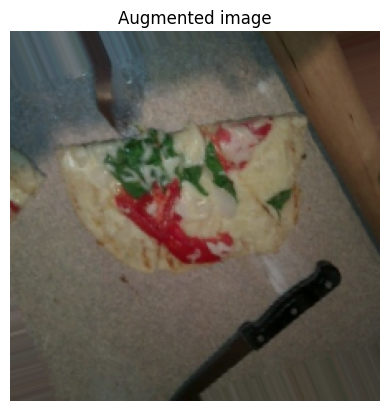

In [71]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_aug.next() # Note: labels aren't augmented, they stay the sam

# Show original image and augmented image
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

#### Make predictions with the trained model

In [77]:
print(class_names)

['pizza' 'steak']


(-0.5, 499.5, 499.5, -0.5)

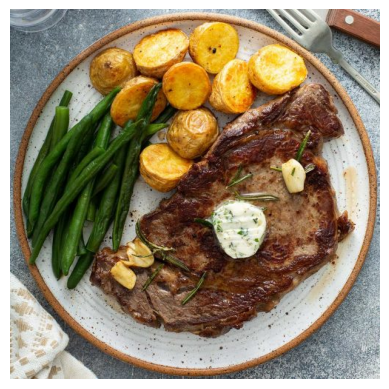

In [79]:
test_steak = mpimg.imread("test_steak.jpg")
plt.imshow(test_steak)
plt.axis(False)

In [80]:
test_steak.shape

(500, 500, 3)

##### The image needs to be resized to (224,224,3)
and also rescaled to 1/255 [0, 1]

In [81]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [82]:
steak = load_and_prep_image('test_steak.jpg')

In [83]:
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.5589292 , 0.61383116, 0.6162471 ],
        [0.62584215, 0.6689794 , 0.67682254],
        [0.63019484, 0.6733321 , 0.6862492 ],
        ...,
        [0.86287564, 0.87782043, 0.92301065],
        [0.52005726, 0.57209   , 0.58658576],
        [0.84071714, 0.9004683 , 0.90945023]],

       [[0.4750572 , 0.5338807 , 0.5589508 ],
        [0.49075288, 0.54898113, 0.5740512 ],
        [0.49674463, 0.547725  , 0.5779071 ],
        ...,
        [0.79494834, 0.86977327, 0.8697383 ],
        [0.70771205, 0.78171694, 0.77488357],
        [0.8044307 , 0.87857383, 0.8714641 ]],

       [[0.54303503, 0.6086322 , 0.652874  ],
        [0.46056303, 0.5269974 , 0.5685813 ],
        [0.42951098, 0.49557272, 0.53573376],
        ...,
        [0.7560391 , 0.7994177 , 0.7934399 ],
        [0.71209943, 0.7864155 , 0.7713466 ],
        [0.63760424, 0.7174203 , 0.70561725]],

       ...,

       [[0.8488188 , 0.8710878 , 0.8308058 ],
        [0.81

In [84]:
model_1.predict(steak)

ValueError: in user code:

    File "C:\Users\User\Desktop\programowanie_web_etc\python_projects\ml_projects\ml_basic\venv\lib\site-packages\keras\src\engine\training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\User\Desktop\programowanie_web_etc\python_projects\ml_projects\ml_basic\venv\lib\site-packages\keras\src\engine\training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\User\Desktop\programowanie_web_etc\python_projects\ml_projects\ml_basic\venv\lib\site-packages\keras\src\engine\training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\User\Desktop\programowanie_web_etc\python_projects\ml_projects\ml_basic\venv\lib\site-packages\keras\src\engine\training.py", line 2381, in predict_step
        return self(x, training=False)
    File "C:\Users\User\Desktop\programowanie_web_etc\python_projects\ml_projects\ml_basic\venv\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\User\Desktop\programowanie_web_etc\python_projects\ml_projects\ml_basic\venv\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(32, 224, 3)


In [85]:
# and also expand dims to simulate a batch size
steak = tf.expand_dims(steak, axis=0)

In [86]:
model_1.predict(steak)

1/1 [==============================] - 0s 53ms/step


array([[0.975664]], dtype=float32)

#### Function to predict and plot on image from file

In [87]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 19ms/step


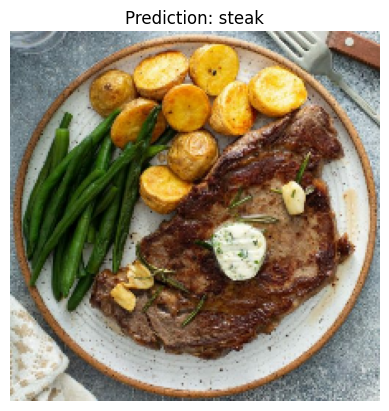

In [89]:
# Test our model on a custom image
pred_and_plot(model_1, "test_steak.jpg", class_names)

In [90]:
model_1.save("conv_model_pizza_steak")

INFO:tensorflow:Assets written to: conv_model_pizza_steak\assets


INFO:tensorflow:Assets written to: conv_model_pizza_steak\assets


In [91]:
loaded_model_1 = tf.keras.models.load_model("conv_model_pizza_steak")
loaded_model_1.evaluate(valid_data)

16/16 [==============================] - 1s 62ms/step - loss: 0.3094 - accuracy: 0.8620


[0.3094026446342468, 0.8619999885559082]